# Домашнее задание. Анализ данных в Pandas

### Описание датасета:

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

### Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


In [ ]:
DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'
BABIES = 'https://raw.githubusercontent.com/evgpat/datasets/main/babies_all.txt'

# Часть 1

In [ ]:
df_diabets = pd.read_csv(DIABETS,
                   sep=',')
df_diabets.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0


In [ ]:
df_diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

**"В переменной {название переменной} {количество} пропущенных значений"**

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
null_df_diabets = df_diabets.isnull().sum()
null_df_diabets


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Class,0


In [ ]:
for column, count in null_df_diabets.items():
    if count > 0:
        print(f"В переменной {column} {count} пропущенных значений")

В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
# дискретные признаки (целочисленные)
discrete_col = df_diabets.select_dtypes(include=["int", "int64", "Int64"]).columns

# непрерывные признаки (вещественные)
continuous_col = df_diabets.select_dtypes(include=["float", "float64"]).columns

# заполнение пропусков
df_diabets[discrete_col] = df_diabets[discrete_col].fillna(df_diabets[discrete_col].median())
df_diabets[continuous_col] = df_diabets[continuous_col].fillna(df_diabets[continuous_col].mean())


In [ ]:
df_diabets.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Class,0


## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
df_diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
np.mean(df_diabets,axis=0)

,0
Pregnancies,3.845052
Glucose,121.686763
BloodPressure,72.405184
SkinThickness,29.153420
Insulin,155.548223
BMI,32.457464
DiabetesPedigreeFunction,0.471876
Age,33.240885
Class,0.348958


In [ ]:
df_diabets.median()

,0
Pregnancies,3.000000
Glucose,117.000000
BloodPressure,72.202592
SkinThickness,29.153420
Insulin,155.548223
BMI,32.400000
DiabetesPedigreeFunction,0.372500
Age,29.000000
Class,0.000000


In [ ]:
df_diabets.min()

,0
Pregnancies,0.000
Glucose,44.000
BloodPressure,24.000
SkinThickness,7.000
Insulin,14.000
BMI,18.200
DiabetesPedigreeFunction,0.078
Age,21.000
Class,0.000


In [ ]:
df_diabets.max()

,0
Pregnancies,17.00
Glucose,199.00
BloodPressure,122.00
SkinThickness,99.00
Insulin,846.00
BMI,67.10
DiabetesPedigreeFunction,2.42
Age,81.00
Class,1.00


In [ ]:
np.var(df_diabets, axis=0, ddof=1)

,0
Pregnancies,11.354056
Glucose,926.346983
BloodPressure,146.321591
SkinThickness,77.280660
Insulin,7228.588766
BMI,47.267706
DiabetesPedigreeFunction,0.109779
Age,138.303046
Class,0.227483


In [ ]:
q = [0.25, 0.5, 0.75]
quant = np.quantile(df_diabets, q, axis=0)

quant_df = pd.DataFrame(
    quant,
    index=["25%", "50%", "75%"],
    columns=df_diabets.columns
)

quant_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
25%,1.0,99.75,64.000000,25.00000,121.500000,27.5,0.24375,24.0,0.0
50%,3.0,117.00,72.202592,29.15342,155.548223,32.4,0.37250,29.0,0.0
75%,6.0,140.25,80.000000,32.00000,155.548223,36.6,0.62625,41.0,1.0


### Boxplot

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_diabets, vert=True)
plt.xlabel("Столбцы")
plt.ylabel("Значения")
plt.title("Boxplot для каждого атрибута")
plt.grid(True)

NameError: name 'plt' is not defined

**Комментарий:** Больше всего дает выбросы столбец 5, где содержаться данные об уровне содержания инсулина в крови


## Задание 4

У скольких женщин строго старше 50 лет обнаружен диабет?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
df_diabets[(df_diabets['Age'] > 50) & (df_diabets['Class'] == 1)].shape[0]

38

## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。


In [ ]:
df_diabets_pregnancies = df_diabets.sort_values(['Pregnancies'], ascending = False)
df_diabets_pregnancies.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.000000,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.000000,37.1,0.153,43,1
455,14,175.0,62.0,30.0,155.548223,33.6,0.212,38,1


## Задание 6

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
df_diabets[(df_diabets['Age'].between(30, 40)) & (df_diabets['Pregnancies'] >= 3)].shape[0]

142

## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
df_diabets['BloodPressure'].between(80, 89).mean() * 100


## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
(df_diabets[(df_diabets['BMI'] >= 30) & (df_diabets['BloodPressure'] > df_diabets['BloodPressure'].mean())].shape[0])

## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

сlass = 0 — здоровы

сlass = 1 — диабет

In [ ]:
df_diabets.groupby('Class')[['Glucose','BloodPressure','Insulin']].mean().reset_index()

In [ ]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Задание 10

Постройте гистограммы для любых двух количественных признаков.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

### 2D диаграмма

In [ ]:
plt.figure(figsize=(6, 5))
plt.hist2d(df_diabets['Age'], df_diabets['Insulin'], bins=20)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.colorbar()

plt.title("Age vs Insulin")
plt.show()

**Комментарий:** чем младше возраст тем больше инсулина

In [ ]:
plt.figure(figsize=(6, 5))
plt.hexbin(df_diabets['Age'], df_diabets['Glucose'], gridsize=20)

plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose')

plt.colorbar()
plt.show()


**Комментарий:** наиболее большая концентрация у людей 20-35 лет у большинства находится глюкоза в диапазоне от 80-130. У женщин старше наблюдение меньше и не показывает четкой зависимости от возраста. Высокие значения встречаются редко и они распределенны равномерно по всем возрастам.

## Задание 11

Постройте круговую диаграмму для признака __Class__.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
plt.figure(figsize=(15,5))

class_counts = df_diabets['Class'].value_counts()

plt.pie(class_counts,
        labels=['0 - Здоровые','1 - Больные'],
        autopct='%1.2f%%',
        startangle=90)

plt.title('Распределение по классу')
plt.show()


**Комментарий:** В датасете больше женщин которые находятся в классе 0 (65.10%)

## Задание 12

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
bmi = df_diabets['BMI']
mu, sigma = bmi.mean(), bmi.std()

x = np.linspace(bmi.min(), bmi.max(), 300)
pdf = norm.pdf(x, mu, sigma)

norm_colors = Normalize(vmin=min(pdf), vmax=max(pdf))

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(bmi,
         bins=20,
         color='blue',
         edgecolor='blue',
         alpha=0.8)
plt.plot(x,
         pdf,
         color='gray',
         linewidth=2,
         label='Normal PDF')
plt.title("Распределение BMI")
plt.xlabel("BMI")
plt.ylabel("Кол-во")

plt.subplot(1,2,2)
plt.hist(bmi,
         bins=20,
         density=True,
         alpha=0.5,
         color='gray',
         label='BMI')
plt.plot(x, pdf,
         color='blue',
         linewidth=2,
         label='Normal')

plt.title("BMI: сравнение с нормальным распределением")
plt.xlabel("BMI")
plt.ylabel("Плотность")

plt.legend()
plt.tight_layout()
plt.show()

Постройте нормальное распределение поверх графика.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
plt.hist(bmi,
         bins=20,
         density=True,
         alpha=0.8,
         color='blue',
         edgecolor='blue',
         label='BMI Histogram')

plt.plot(x, pdf,
         color='gray',
         linewidth=2.5,
         label='Normal Distribution')

plt.title("Распределение BMI с нормальным распределением поверх")
plt.xlabel("BMI")
plt.ylabel("Плотность")

plt.legend()

plt.show()

**Комментарий:** Распредление массы тела у женщин в датасете отличается от нормального. Распредление ассиметрично(более длинный правый хвост). Пик распредления смещен влево, плотность приходится на значения 26-35 лет. Распредление более "острое" и узкое, чем нормальное.

Это все указывает на наличие значимого числа женщин с избыточным весом и ожирением.

## Задание 13

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
pregnancies_class = df_diabets.groupby('Pregnancies')['Class'].mean() * 100

x = pregnancies_class.index.values
y = pregnancies_class.values

In [ ]:
norm = Normalize(vmin=y.min(),
                 vmax=y.max())
cmap = cm.inferno  # можно поменять на viridis, inferno, magma
colors = cmap(norm(y))

plt.figure(figsize=(20,6))

plt.plot(x, y,
         color="gray",
         linewidth=2,
         alpha=0.8)


plt.scatter(x, y,
            c=colors,
            s=120,
            edgecolor="black")

plt.xlabel("Количество беременностей")
plt.ylabel("Процент больных диабетом")
plt.title("Процент больных диабетом в зависимости от числа беременностей")
plt.grid(alpha=0.8)


sm = cm.ScalarMappable(norm=norm,
                       cmap=cmap)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="% больных диабетом")

plt.show()

**Комментарий:** В целом четко прослеживается тенденция с увеличением кол-ва беременностей процент с диабетом возрастает. 0-2 число беременностей доля больных составляет (18-34%), далее начинает расти количество больных диабетом, следовательно растет риск получения диабета.

## Задание 14

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
df_diabets['wasPregnant'] = (df_diabets['Pregnancies']>0).astype(bool)

In [ ]:
df_diabets.head(4)

In [ ]:
df_diabets['wasPregnant'] = df_diabets['wasPregnant'].astype(int)

In [ ]:
df_diabets.iloc[4:10]

## Задание 15

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
df_percent_diabets=(df_diabets.groupby('wasPregnant')['Class'].mean().mul(100).round(2).rename('% диабета').reset_index())

## Задание 16

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

df_diabets['bodyType'] = df_diabets['BMI'].apply(bmi_category)

In [ ]:
df_diabets.head(4)

## Задание 17

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
# критерий нормального давления
normal_bp = df_diabets['BloodPressure'].between(80, 89)

# критерий нормального веса
normal_weight = df_diabets['bodyType'] == "Normal weight"

# выбираем “здоровых” женщин
healthy = df_diabets[normal_bp & normal_weight]

# процент "здоровых", которые больны диабетом
percent_diabetic = (healthy['Class'].mean() * 100).round(2)

percent_diabetic


# Часть 2

In [ ]:
babies = pd.read_csv(BABIES, index_col=0)
babies.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Задание 1

Исследуйте набор данных `babies`. Ответьте на вопросы.

1. Какие годы включает датасет

2. Какое имя в датасете находится по индексом 121?

3. Cколько всего родилось детей по имени 'Aaron' за все время?

4. Насколько больше за все время родилось мальчиков чем девочек?

5. Cколько мальчиков родилось в 2010?

6. Сколько в датасете девочек по имени John?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:
babies.sort_values(['year'], ascending=False)

In [ ]:
babies.groupby('year').year.count()

Какое имя в датасете находится по индексом 121?

In [ ]:
babies.loc[121].head(1)

Cколько всего родилось детей по имени 'Aaron' за все время?

In [ ]:
babies[babies['name'] == 'Aaron'].shape[0]

In [ ]:
babies[babies['sex'] == 'F'].shape[0]

In [ ]:
babies[babies['sex'] == 'M'].shape[0]

In [ ]:
babies[(babies['sex'] == 'M') & (babies['year'] == 2010)].shape[0]

In [ ]:
babies[(babies['name'] == 'John') & (babies['sex'] == 'F')].shape[0]

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

2. Создайте фигуру matplotlib с 3 графиками один под другим.

3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y.

4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.

5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут `.index`

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

In [ ]:

# 1) Группировка по году и полу + два датафрейма
grouped = babies.groupby(['sex', 'year']).size().reset_index(name='count')

baby_girls = grouped[grouped['sex'] == 'F'].copy()
baby_boys  = grouped[grouped['sex'] == 'M'].copy()

# (на всякий случай сортируем по году)
baby_girls = baby_girls.sort_values('year')
baby_boys  = baby_boys.sort_values('year')


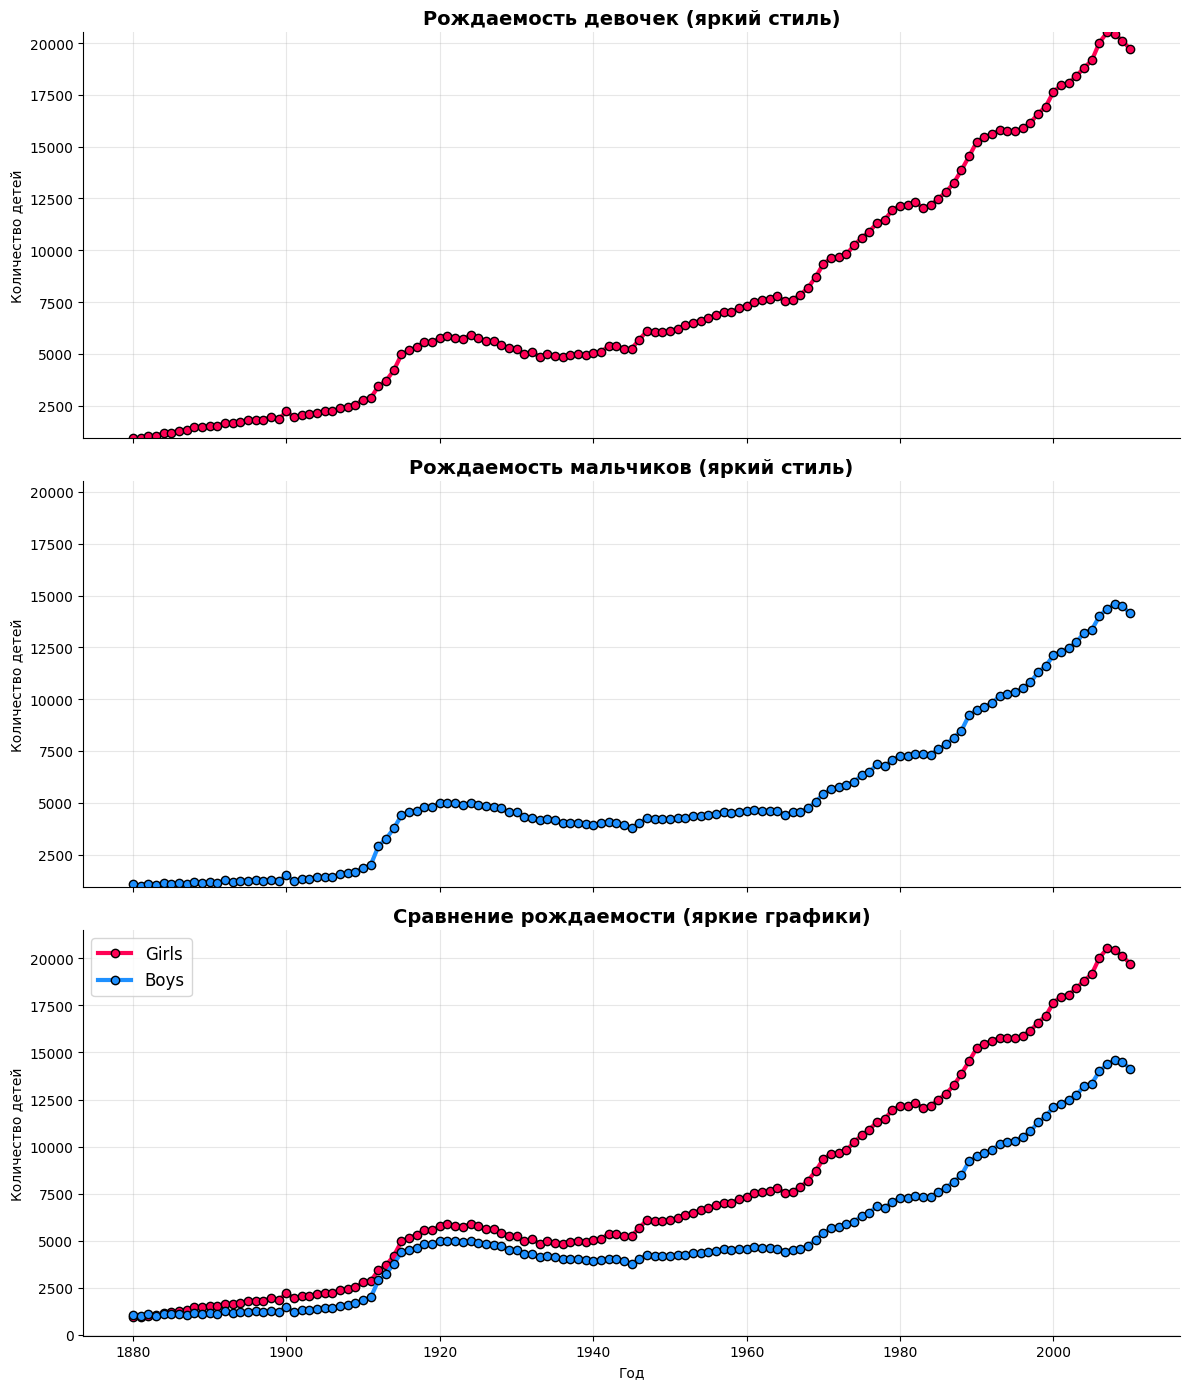

In [ ]:
# Цвета — яркие, контрастные
girls_color = "#ff0054"   # ярко-розовый
boys_color  = "#1e90ff"   # ярко-синий

# 2) Фигура
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

# Общие лимиты
y_min = min(baby_girls['count'].min(), baby_boys['count'].min())
y_max = max(baby_girls['count'].max(), baby_boys['count'].max())

# 3) Графики

# --- Девочки ---
axes[0].plot(
    baby_girls['year'], baby_girls['count'],
    color=girls_color, linewidth=3, marker='o', markersize=6, markeredgecolor='black'
)
axes[0].set_title('Рождаемость девочек (яркий стиль)', fontsize=14, weight='bold')
axes[0].set_ylabel('Количество детей')
axes[0].set_ylim(y_min, y_max)

# --- Мальчики ---
axes[1].plot(
    baby_boys['year'], baby_boys['count'],
    color=boys_color, linewidth=3, marker='o', markersize=6, markeredgecolor='black'
)
axes[1].set_title('Рождаемость мальчиков (яркий стиль)', fontsize=14, weight='bold')
axes[1].set_ylabel('Количество детей')
axes[1].set_ylim(y_min, y_max)

# --- Оба ---
axes[2].plot(
    baby_girls['year'], baby_girls['count'],
    color=girls_color, linewidth=3, marker='o', markersize=6, markeredgecolor='black',
    label='Girls'
)
axes[2].plot(
    baby_boys['year'], baby_boys['count'],
    color=boys_color, linewidth=3, marker='o', markersize=6, markeredgecolor='black',
    label='Boys'
)

axes[2].set_title('Сравнение рождаемости (яркие графики)', fontsize=14, weight='bold')
axes[2].set_xlabel('Год')
axes[2].set_ylabel('Количество детей')
axes[2].legend(fontsize=12)

# 4) Дизайн: убираем границы, добавляем светлую сетку
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Комментарии:** Графики показывают долгосрочный рост рождаемости девочек и мальчиков, прерываемый историческими кризисами. Мальчиков стабильно рождается чуть больше, чем девочек, однако динамика обоих полов практически идентична. Это указывает на устойчивость демографических закономерностей на протяжении более чем ста лет.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.

4. Постройте 4 линейных графика - тренд для каждого имени за все время.

5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.

6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

7. Опишите тренды в ячейке markdown под графиками.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

Top girls: ['Mary', 'Patricia']
Top boys: ['James', 'John']


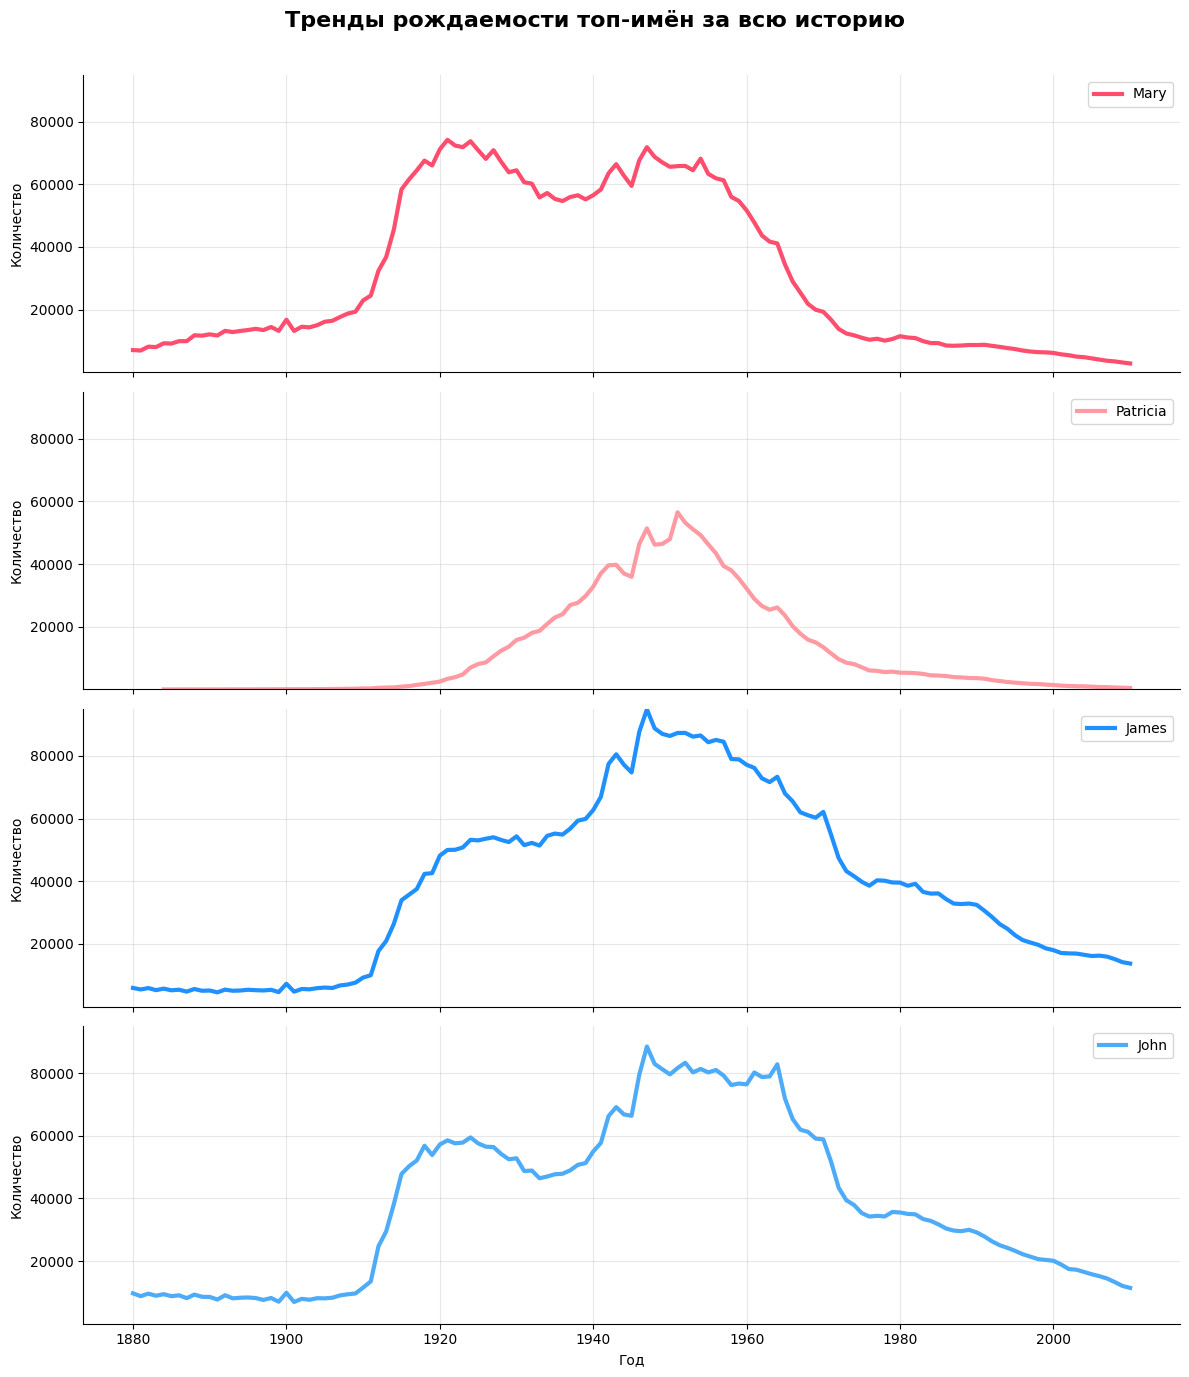

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Находим 2 самых популярных женских и 2 мужских имени за всю историю
# Суммируем number по каждому имени внутри пола
top_names = (babies
             .groupby(['sex', 'name'])['number']
             .sum()
             .reset_index())

top_girls = (top_names[top_names['sex'] == 'F']
             .sort_values('number', ascending=False)
             .head(2))

top_boys = (top_names[top_names['sex'] == 'M']
            .sort_values('number', ascending=False)
            .head(2))

girls_names = top_girls['name'].tolist()
boys_names = top_boys['name'].tolist()

print("Top girls:", girls_names)
print("Top boys:", boys_names)

# 2) Для каждого имени создаём датафрейм с количеством по годам
def make_name_df(df, name):
    return (df[df['name'] == name]
            .groupby('year')['number']
            .sum()
            .reset_index(name='count'))

# создаём 4 датафрейма
babies_name_1 = make_name_df(babies, girls_names[0])
babies_name_2 = make_name_df(babies, girls_names[1])
babies_name_3 = make_name_df(babies, boys_names[0])
babies_name_4 = make_name_df(babies, boys_names[1])

# для удобства сложим их в список
name_dfs = [
    (girls_names[0], babies_name_1, '#ff4d6d'),
    (girls_names[1], babies_name_2, '#ff9aa2'),
    (boys_names[0],  babies_name_3, '#1e90ff'),
    (boys_names[1],  babies_name_4, '#4dabf7'),
]

# 3) Фигура с 4 графиками один под другим
fig, axes = plt.subplots(4, 1, figsize=(12, 14), sharex=True)

# 6) Одинаковые лимиты по Y для всех графиков
y_min = min(df_['count'].min() for _, df_, _ in name_dfs)
y_max = max(df_['count'].max() for _, df_, _ in name_dfs)

# 4–5) Строим 4 линейных графика
for ax, (nm, df_nm, color) in zip(axes, name_dfs):
    ax.plot(df_nm['year'], df_nm['count'],
            color=color, linewidth=3, label=nm)
    ax.set_ylabel("Количество")
    ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[-1].set_xlabel("Год")

# один общий заголовок
fig.suptitle("Тренды рождаемости топ-имён за всю историю", fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Комментарии:** Женские имена показывают короткие, мощные пики, после которых популярность резко падает.

Мужские имена — длительные тренды, с более плавными подъёмами и длительными периодами высокой распространённости.

Самые устойчивые имена: James и John.

Самые быстро меняющиеся по моде: Mary и особенно Patricia.

В целом графики показывают, что мода на имена существует, имеет цикличный характер и зависит от культурных и социальных тенденций своей эпохи.